In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('foodcost.csv')
df

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


In [3]:
df.isnull()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
12685,False,False,False,False,False,False,False,False,False
12686,False,False,False,False,False,False,False,False,False
12687,False,False,False,False,False,False,False,False,False
12688,False,False,False,False,False,False,False,False,False


In [6]:
df.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


As we can see that there are some mising values present in this Dataset, so lets remove these missing values by using Simple Imputer function

In [8]:
from sklearn.impute import SimpleImputer

In [10]:
imp=SimpleImputer(missing_values=np.NaN,strategy='most_frequent')
df['CITY']=imp.fit_transform(df['CITY'].values.reshape(-1,1))
df['LOCALITY']=imp.fit_transform(df['LOCALITY'].values.reshape(-1,1))
df['RATING']=imp.fit_transform(df['RATING'].values.reshape(-1,1))
df['VOTES']=imp.fit_transform(df['VOTES'].values.reshape(-1,1))

In [11]:
df.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
COST             0
dtype: int64

In [12]:
# Now after using SimpleImputer function we can see that there are no null values present in this Dataset

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12690 non-null  object
 5   LOCALITY       12690 non-null  object
 6   RATING         12690 non-null  object
 7   VOTES          12690 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


As we can see that most of the Attributes are in Object form and we cant use mathmatical function in Object, so we need to convert them to integer by usng Label Encoder function

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
le=LabelEncoder()
df['TITLE']=le.fit_transform(df['TITLE'].astype('str'))
df['CUISINES']=le.fit_transform(df['TITLE'].astype('str'))
df['TIME']=le.fit_transform(df['TIME'].astype('str'))
df['CITY']=le.fit_transform(df['CITY'].astype('str'))
df['LOCALITY']=le.fit_transform(df['LOCALITY'].astype('str'))
df['RATING']=le.fit_transform(df['RATING'].astype('str'))
df['VOTES']=le.fit_transform(df['VOTES'].astype('str'))

In [20]:
df.dtypes

TITLE            int32
RESTAURANT_ID    int64
CUISINES         int32
TIME             int32
CITY             int32
LOCALITY         int32
RATING           int32
VOTES            int32
COST             int64
dtype: object

In [21]:
# NOW, after using LabelEncoder we can see that all the objectsare now converted into Intergers

lets drop some columns as they are no going to make any diffrence in our Target

In [22]:
df.drop(['RESTAURANT_ID'],axis=1,inplace=True)

In [23]:
df.columns

Index(['TITLE', 'CUISINES', 'TIME', 'CITY', 'LOCALITY', 'RATING', 'VOTES',
       'COST'],
      dtype='object')

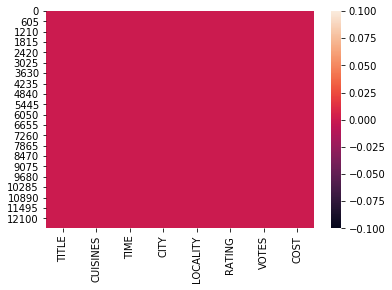

In [24]:
sns.heatmap(df.isnull())

There is no change is color means there is no mising values present in this Dataset at this point

In [25]:
df.corr()

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
TITLE,1.000000,0.901114,0.053914,-0.016281,0.026614,-0.039748,0.009756,-0.263581
CUISINES,0.901114,1.000000,0.017368,-0.023430,0.029791,-0.043342,0.007895,-0.233799
TIME,0.053914,0.017368,1.000000,-0.011372,-0.008062,-0.035337,0.016003,0.018248
CITY,-0.016281,-0.023430,-0.011372,1.000000,0.043072,0.026137,0.012734,0.044555
LOCALITY,0.026614,0.029791,-0.008062,0.043072,1.000000,-0.023361,0.005459,-0.015050
RATING,-0.039748,-0.043342,-0.035337,0.026137,-0.023361,1.000000,-0.010109,0.236941
VOTES,0.009756,0.007895,0.016003,0.012734,0.005459,-0.010109,1.000000,-0.013715
COST,-0.263581,-0.233799,0.018248,0.044555,-0.015050,0.236941,-0.013715,1.000000


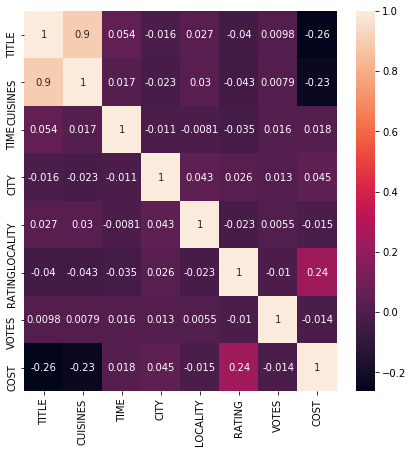

In [27]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(),annot=True)

From this heatmap we can se that light color boxes are positivey corelated and dark color boxes are negatively corelated

In [28]:
df.sample(10)

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
7842,87,99,595,67,555,13,996,350
1642,95,108,99,37,338,31,1202,200
2822,31,38,325,320,1289,24,1191,700
3166,31,38,1350,67,365,22,1292,800
9784,31,38,1084,131,590,16,1414,500
10084,87,99,211,67,342,22,57,800
8222,60,70,1560,37,675,25,1653,2700
2929,31,38,555,37,338,20,367,600
8130,31,38,237,252,1015,19,1610,1500
7428,31,38,1277,37,458,21,911,700


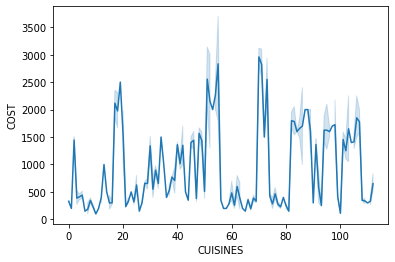

In [29]:
sns.lineplot(df['CUISINES'],df['COST'])
plt.show()

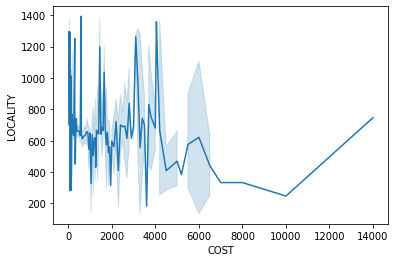

In [30]:
sns.lineplot(df['COST'],df['LOCALITY'])
plt.show()

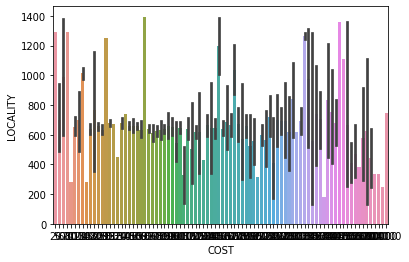

In [31]:
sns.barplot(df['COST'],df['LOCALITY'])
plt.show()

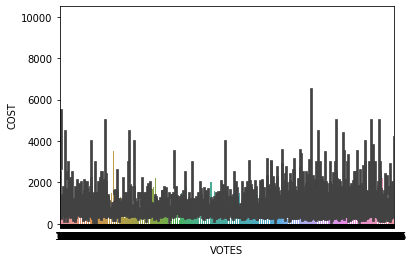

In [32]:
sns.barplot(df['VOTES'],df['COST'])
plt.show()

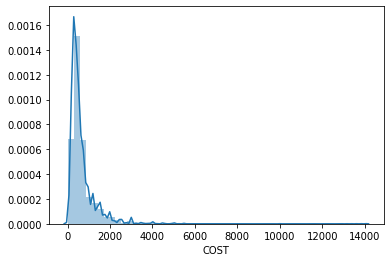

In [33]:
sns.distplot(df['COST'])
plt.show()

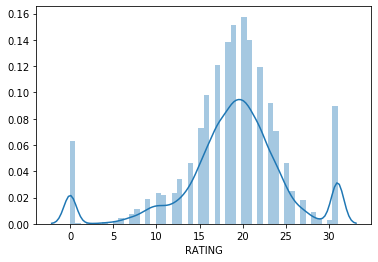

In [35]:
sns.distplot(df['RATING'])
plt.show()

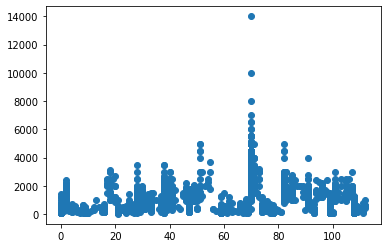

In [36]:
plt.scatter(df['CUISINES'],df['COST'])
plt.show()

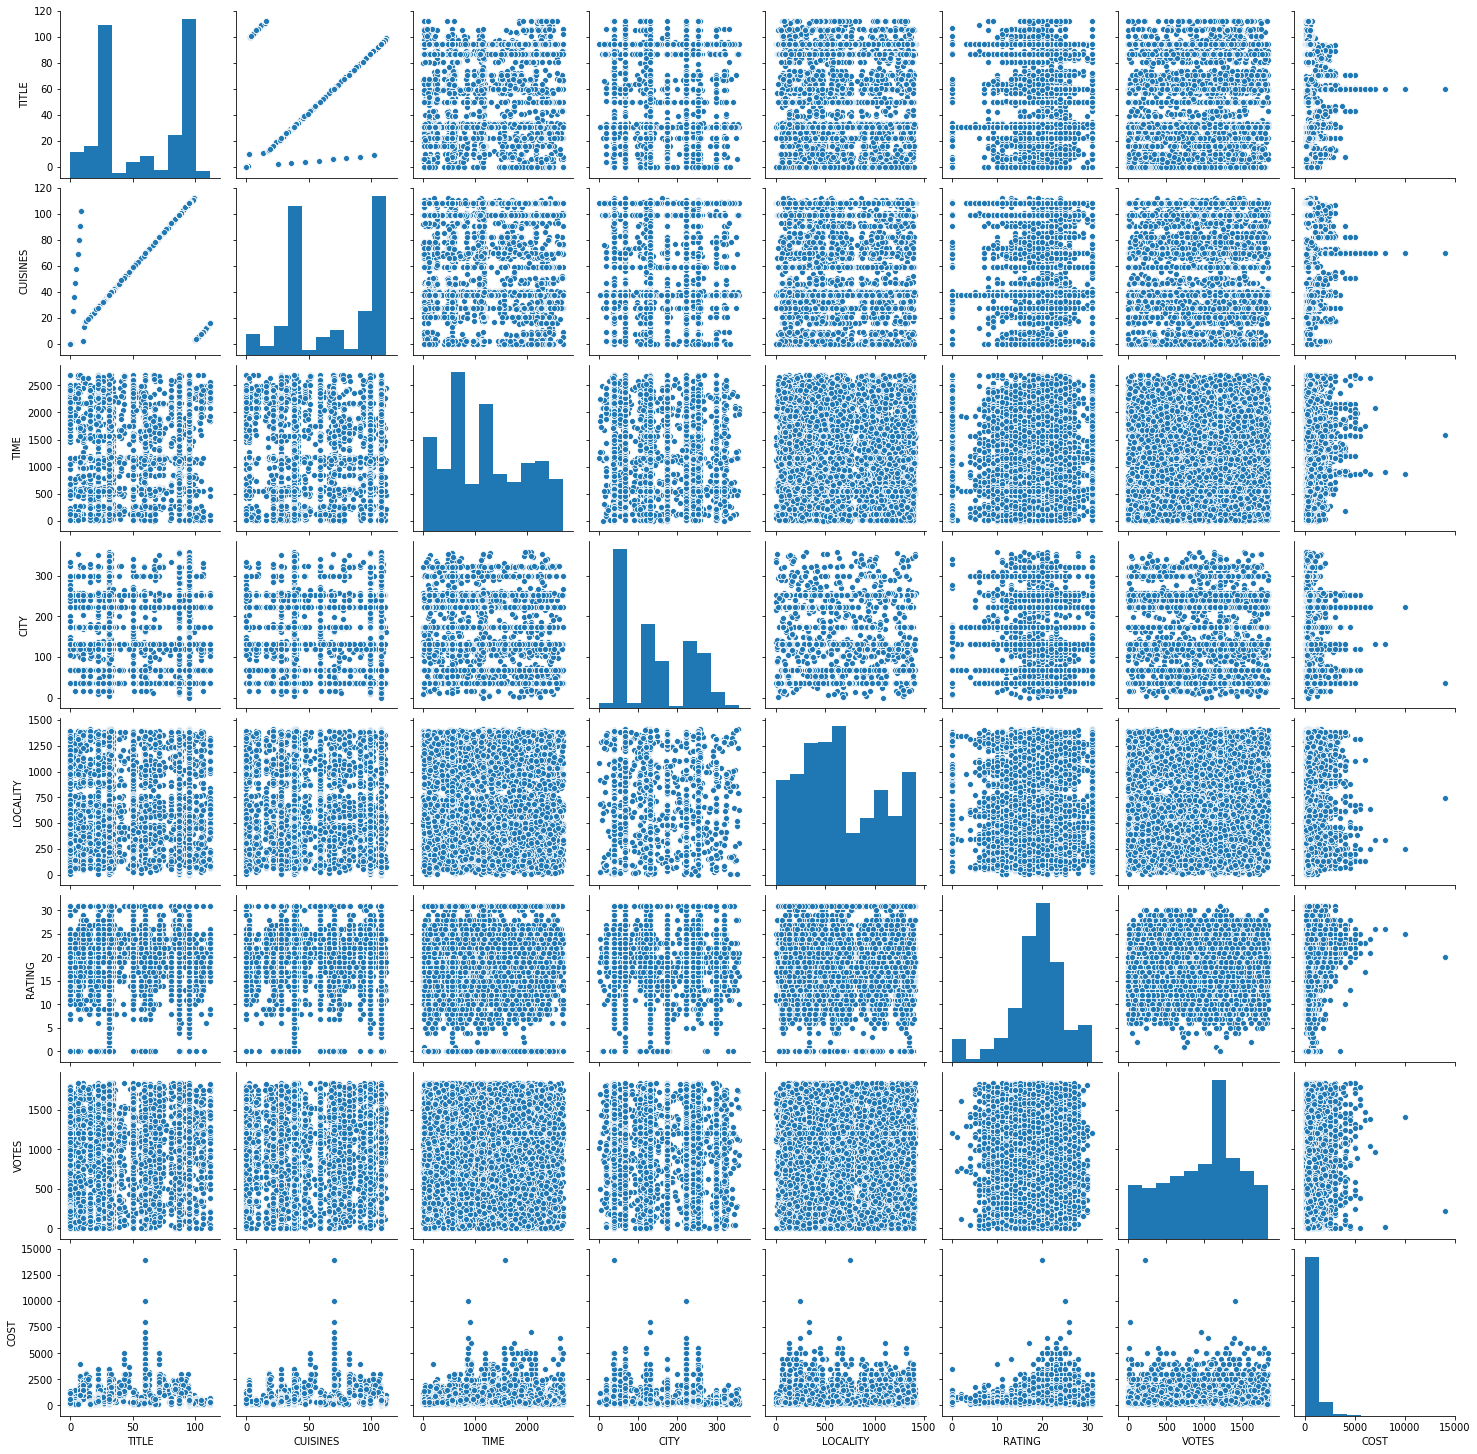

In [37]:
sns.pairplot(df)

In [38]:
df.describe()

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
count,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000
mean,59.465721,68.511348,1180.084003,142.281403,652.391568,18.795902,991.443578,655.252246
std,32.762427,35.571161,754.459944,83.921428,399.116379,6.181352,482.531198,627.003540
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
25%,31.000000,38.000000,555.000000,67.000000,337.000000,16.000000,619.000000,300.000000
50%,59.000000,68.000000,1123.000000,131.000000,582.000000,19.000000,1100.000000,500.000000
75%,95.000000,108.000000,1847.000000,222.000000,1009.000000,22.000000,1341.000000,800.000000
max,112.000000,112.000000,2688.000000,358.000000,1415.000000,31.000000,1846.000000,14000.000000


Lets try to find out some Outliers visuallt by using Box plot

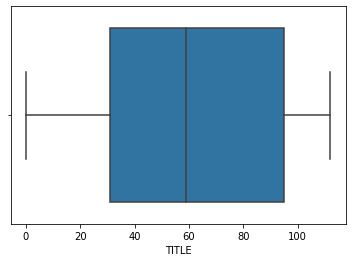

In [39]:
sns.boxplot(df['TITLE'])
plt.show()

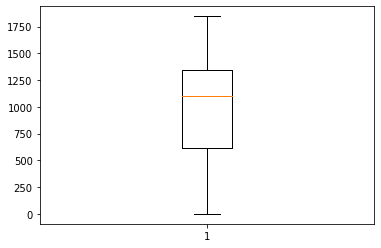

In [40]:
plt.boxplot(df['VOTES'])
plt.show()

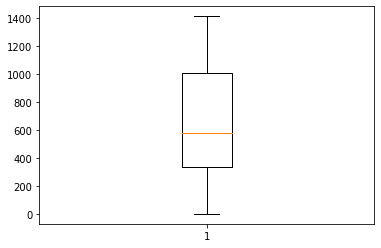

In [41]:
plt.boxplot(df['LOCALITY'])
plt.show()

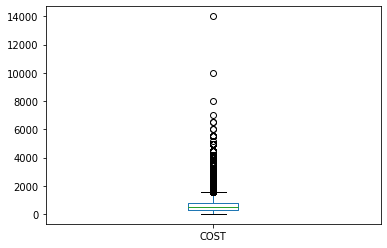

In [43]:
df['COST'].plot.box()

In [42]:
from scipy.stats import zscore

In [44]:
z=np.abs(zscore(df))
z

array([[0.86888688, 0.85778897, 0.58465845, ..., 0.29054698, 0.59388432,
        0.86884552],
       [0.80783894, 0.80156144, 0.93436872, ..., 0.68015275, 0.08589126,
        1.34733058],
       [0.86888688, 0.85778897, 0.68804774, ..., 0.0330196 , 0.57914305,
        0.23086546],
       ...,
       [0.35207201, 0.37921686, 0.057108  , ..., 0.35658617, 0.9047573 ,
        1.02834054],
       [0.86888688, 0.85778897, 0.87074455, ..., 0.45233026, 0.00944312,
        0.40711461],
       [0.86888688, 0.85778897, 0.4574101 , ..., 0.61411355, 1.06433876,
        0.08812458]])

In [45]:
np.where(z>3)

(array([   13,    84,    85,   156,   178,   208,   235,   253,   308,
          329,   337,   369,   374,   379,   392,   396,   422,   428,
          438,   452,   453,   455,   469,   473,   480,   502,   508,
          563,   577,   604,   615,   625,   644,   690,   731,   749,
          751,   772,   787,   831,   838,   839,   874,   911,   919,
          949,   966,   967,   973,   981,   993,   994,  1009,  1054,
         1126,  1133,  1193,  1196,  1205,  1227,  1287,  1288,  1297,
         1345,  1365,  1366,  1395,  1468,  1470,  1472,  1475,  1502,
         1543,  1555,  1581,  1594,  1596,  1597,  1632,  1635,  1657,
         1696,  1701,  1711,  1748,  1759,  1764,  1778,  1792,  1806,
         1828,  1839,  1855,  1878,  1884,  1884,  1903,  1916,  1930,
         1931,  1983,  2025,  2039,  2053,  2082,  2092,  2096,  2100,
         2109,  2111,  2115,  2124,  2205,  2207,  2251,  2254,  2313,
         2327,  2333,  2339,  2349,  2369,  2407,  2434,  2439,  2459,
      

In [46]:
z[13][5]

3.040862860807884

In [47]:
z[84][7]

4.537230920101538

In [48]:
df1=df[(z<3).all(axis=1)]
df1

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,31,38,739,320,285,17,1278,1200
1,33,40,1885,67,1046,23,950,1500
2,31,38,661,67,1101,19,712,800
3,95,108,275,222,136,22,787,800
4,50,59,615,222,620,19,470,300
...,...,...,...,...,...,...,...,...
12685,95,108,1144,131,342,19,1349,500
12686,33,40,1177,222,133,24,191,1800
12687,71,82,1137,239,1342,21,1428,1300
12688,31,38,1837,67,631,16,996,400


In [49]:
df.shape

(12690, 8)

Here we can clearly see that around 720 rowsare deleted as OUTLIERS from this Dataset

# LETS SELECT OUR TARGET VARIABLE(Y) AND INDEPENDENT VARIABLES(X) TO TRAIN OUR MODEL

In [50]:
x=df1.iloc[:,0:7]
x

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,31,38,739,320,285,17,1278
1,33,40,1885,67,1046,23,950
2,31,38,661,67,1101,19,712
3,95,108,275,222,136,22,787
4,50,59,615,222,620,19,470
...,...,...,...,...,...,...,...
12685,95,108,1144,131,342,19,1349
12686,33,40,1177,222,133,24,191
12687,71,82,1137,239,1342,21,1428
12688,31,38,1837,67,631,16,996


In [51]:
y=df1.iloc[:,-1]
y

0        1200
1        1500
2         800
3         800
4         300
         ... 
12685     500
12686    1800
12687    1300
12688     400
12689     600
Name: COST, Length: 11972, dtype: int64

# NOW, WE HAVE TO TRAIN OUR MODEL AND PUT LINEAR REGRESSION TECHNIQUE

In [52]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [53]:
max_r_score=0
for r_state in range(10,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20, random_state=r_state)
    linr=LinearRegression()
    linr.fit(x_train,y_train)
    predlinr=linr.predict(x_test)
    r2score=r2_score(y_test,predlinr)
    if(r2score>max_r_score):
        max_r_score=r2score
        final_r_state=r_state
print('')
print('The max r2score corresponing to the',final_r_state,'is',max_r_score)


The max r2score corresponing to the 34 is 0.2145438845275568


In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20, random_state=34)

In [55]:
linr.fit(x_train,y_train)
linr.score(x_train,y_train)

0.17790803796978039

In [56]:
predlinr=linr.predict(x_test)

In [57]:
print('R2-Score=',r2_score(y_test,predlinr))
print(mean_absolute_error(y_test,predlinr))
print('RMSE=',np.sqrt(mean_squared_error(y_test,predlinr)))

R2-Score= 0.2145438845275568
273.9128760238172
RMSE= 398.03515865476726


# ENSEMBLE TECHNIQUES

In [58]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

In [61]:
rf=RandomForestRegressor(n_estimators=200,random_state=34)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)

0.9542596278794

In [62]:
predrf=rf.predict(x_test)
print('r2Score =',r2_score(y_test,predrf))

r2Score = 0.6814112162586359


In [65]:
ad=AdaBoostRegressor(n_estimators=150,random_state=34)
ad.fit(x_train,y_train)
ad.score(x_train,y_train)

0.32583820794552476

In [66]:
predad=ad.predict(x_test)
print('r2score=', r2_score(y_test,predad))

r2score= 0.32940279225524705


In [67]:
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)
gb.score(x_train,y_train)

0.6791293744463056

In [68]:
predgb=gb.predict(x_test)
print('r2score=',r2_score(y_test,predgb))

r2score= 0.6701298477720392


# REGULARLISATION TECHNIQUES

In [69]:
from sklearn.linear_model import Lasso, Ridge,ElasticNet

GRID SEARCH CV

In [70]:
from sklearn.model_selection import GridSearchCV   # Grid Search CV
alphavalue={'alpha':[1,0.1,0.01,0.001,0.0001,0]}
model=Lasso()
grid=GridSearchCV(estimator=model, param_grid=alphavalue)
grid.fit(x,y)
print(grid)

#Summerize the result of Grid Search
print(grid.best_score_)
print(grid.best_estimator_.alpha)
print(grid.best_params_)

GridSearchCV(cv=None, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
0.1827094920718108
1
{'alpha': 1}


In [71]:
ls=Lasso(alpha=1)   # Reduce the coef to zero
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.17790776612239645

In [72]:
ls.coef_

array([-5.07504608e+00,  1.38492181e-01,  3.71868064e-03,  7.91585296e-02,
       -5.41374344e-03,  1.82993394e+01, -1.85204331e-02])

In [73]:
alphavalue={'alpha':[1,0.1,0.01,0.001,0.0001,0]}
model=Ridge()
grid=GridSearchCV(estimator=model, param_grid=alphavalue)
grid.fit(x,y)
print(grid)

#Summerize the result of Grid Search
print(grid.best_score_)
print(grid.best_estimator_.alpha)
print(grid.best_params_)

GridSearchCV(cv=None, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
0.18270607261184943
1
{'alpha': 1}


In [74]:
rd=Ridge(alpha=1)  # Reduce the coef varience
rd.fit(x_train,y_train)
rd.score(x_train,y_train)

0.1779080379690663

In [75]:
rd.coef_

array([-5.08339721e+00,  1.46650330e-01,  3.72896515e-03,  7.91333251e-02,
       -5.41278335e-03,  1.83399200e+01, -1.85499536e-02])

In [76]:
enr=ElasticNet(alpha=0.0001)        #  ELASTICNET
enr.fit(x_train,y_train)
enr.score(x_train,y_train)

0.1779080379695973

# TO SAVE THE BEST MODEL

In [77]:
from sklearn.externals import joblib

In [78]:
joblib.dump(rf,'rf-foodcost.obj')

['rf-foodcost.obj']